In [98]:
import platform as python_platform

class Platform:
    WINDOWS = "Windows"
    MACOS = "Darwin"

platform = python_platform.system()

windows_root_directory = "D:/Vector A/0. KHTN/Nam 4/HKII/Thesis/Brainstorming/DataCrawling"
mac_root_directory = "/Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling"

root_directory = windows_root_directory if platform == Platform.WINDOWS else mac_root_directory

In [99]:
import os
from os.path import join, getsize
import re

import sys
sys.path.append(root_directory)

from bs4 import BeautifulSoup

import file_utils as fu

In [100]:
def copy_structure(source, destination):
    '''Copy the structure of the source directory to the destination directory'''
    for root, dirs, files in os.walk(source):
        for dir in dirs:
            new_dir = f"{destination}/{root.replace(source, '')}/{dir}"
            
            regex_pattern = r"\/{2,}"            
            new_dir = re.sub(regex_pattern, "/", new_dir)

            os.makedirs(new_dir, exist_ok=True)

In [101]:
json_from_html_dir = fu.relative_to_absolute_path(
    "DataPreprocessing/json_from_html",
    root_path=root_directory
)

raw_html_dir = fu.relative_to_absolute_path(
    "GetAllSongHTML/song_list/raw_html",
    root_path=root_directory
)

copy_structure(
    source=raw_html_dir, 
    destination=json_from_html_dir
)

In [102]:
json_song_list_link_by_artist_dir = fu.relative_to_absolute_path(
    "GetAllSongHTML/song_list_link_by_artist/json",
    root_path=root_directory
)

In [103]:
def raw_html_processing(song_link_json_item):    
    file_path = fu.relative_to_absolute_path(
        fu.song_link_to_relative_html_file_path(
            song_link_json_item["link"]
        ),
        root_path=raw_html_dir
    )

    page_source = fu.read_data_from_html_file(file_path)

    # Đưa vào BeautifulSoup để dễ xử lý
    soup = BeautifulSoup(page_source, 'html.parser')

    # Tìm tất cả thẻ h2 và in ra
    h2s = soup.find_all('h2')

    for h2 in h2s:
        print(h2.text)

    # Lấy tất cả text trong thẻ h2 cho đến khi gặp thẻ chứa text là "Open In Hookpad" và in ra
    for h2 in h2s:
        if h2.text == "Open In Hookpad":
            break
        print(h2.text)
    

In [104]:
song_links = fu.read_data_from_json_file(
    fu.relative_to_absolute_path(
        "a.json",
        root_path=json_song_list_link_by_artist_dir
    )
)

link = song_links[1250]
# print(item["artist_name"])
# print(item["song_name"])

raw_html_processing(link)

Chorus
Open In Hookpad
56
55
0
9
16
Chorus


In [105]:
def h2_tag_statistic(letters):
    h2_tag_text_frequency = {}

    song_links = []
    for letter in letters:
        json_file_path = fu.relative_to_absolute_path(
            f"{letter}.json",
            root_path=json_song_list_link_by_artist_dir
        )
        
        print("json_file_path", json_file_path)

        song_links.extend([
            fu.song_link_to_relative_html_file_path(item["link"])
            for item in fu.read_data_from_json_file(json_file_path)
        ])

    for link in song_links:
        file_path = fu.relative_to_absolute_path(link, root_path=raw_html_dir)

        page_source = fu.read_data_from_html_file(file_path)

        # Đưa vào BeautifulSoup để dễ xử lý
        soup = BeautifulSoup(page_source, 'html.parser')

        # Tìm tất cả thẻ h2 
        h2s = soup.find_all('h2')

        # Đếm tần suất xuất hiện của text trong thẻ h2
        for h2 in h2s:
            text = h2.text

            should_ignore = text.__contains__("Open In Hookpad") or re.search(r"^[\d\s]+$", text)
            
            print(text, "ignore" if should_ignore else "added", file_path)

            if should_ignore:
                continue
            elif text in h2_tag_text_frequency:
                h2_tag_text_frequency[text] += 1
            else:
                h2_tag_text_frequency[text] = 1


    return h2_tag_text_frequency

In [106]:
k = ['q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# gộp các phần tủ của k thành một chuỗi
t = ''.join(k)

print(t)

qrstuvwxyz


In [107]:
start_letter = 'a'
end_letter = 'c'

letters = [chr(letter) for letter in range(ord(start_letter), ord(end_letter) + 1)]
letters_h2_text_frequency = h2_tag_statistic(letters)

song_part_frequency_file_path = fu.relative_to_absolute_path(
    f"DataPreprocessing/song_part_frequency/{''.join(letters)}.json",
    root_path=root_directory
)

fu.write_data_to_json_file(letters_h2_text_frequency, song_part_frequency_file_path)

json_file_path /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling/GetAllSongHTML/song_list_link_by_artist/json/a.json
json_file_path /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling/GetAllSongHTML/song_list_link_by_artist/json/b.json
json_file_path /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling/GetAllSongHTML/song_list_link_by_artist/json/c.json
Intro added /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling/GetAllSongHTML/song_list/raw_html/a/a-boogie-wit-da-hoodie/drowning.html
Open In Hookpad ignore /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling/GetAllSongHTML/song_list/raw_html/a/a-boogie-wit-da-hoodie/drowning.html
62 ignore /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling/GetAllSongHTML/song_list/raw_html/a/a-boogie-wit-da-hoodie/drowning.html
21 ignore /Users/4rr311/Documents/VectorA/KHTN/Na

In [108]:
print(letters)
print(letters_h2_text_frequency)

['a', 'b', 'c']
{'Intro': 870, 'Instrumental': 256, 'Intro and Verse': 226, 'Pre-Chorus and Chorus': 194, 'Verse': 1992, 'Pre-Chorus': 534, 'Chorus': 2647, 'Bridge': 412, 'Verse and Pre-Chorus': 250, 'Solo': 71, 'Outro': 151, 'Chorus Lead-Out': 127, 'Pre-Outro': 28, '': 8, 'Solo 1': 24, 'Solo 2': 15, 'Outro 1': 8, 'Outro 2': 6, 'Solo 3': 4, 'Instrumental Intro': 1, 'Theme': 1, 'Variation 1': 1, 'Variation 2': 1, 'Variation 17': 1, 'Variation 18': 1}


In [118]:
# In các key trong letters_h2_text_frequency
for key in letters_h2_text_frequency:
    print(key)

Intro
Instrumental
Intro and Verse
Pre-Chorus and Chorus
Verse
Pre-Chorus
Chorus
Bridge
Verse and Pre-Chorus
Solo
Outro
Chorus Lead-Out
Pre-Outro

Solo 1
Solo 2
Outro 1
Outro 2
Solo 3
Instrumental Intro
Theme
Variation 1
Variation 2
Variation 17
Variation 18


/var/folders/y6/qf0ggfbn3hl620td2cm801sw0000gn/T/ipykernel_67136/3342975924.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_10.keys(), rotation=90)
/var/folders/y6/qf0ggfbn3hl620td2cm801sw0000gn/T/ipykernel_67136/3342975924.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(bottom_10.keys(), rotation=90)


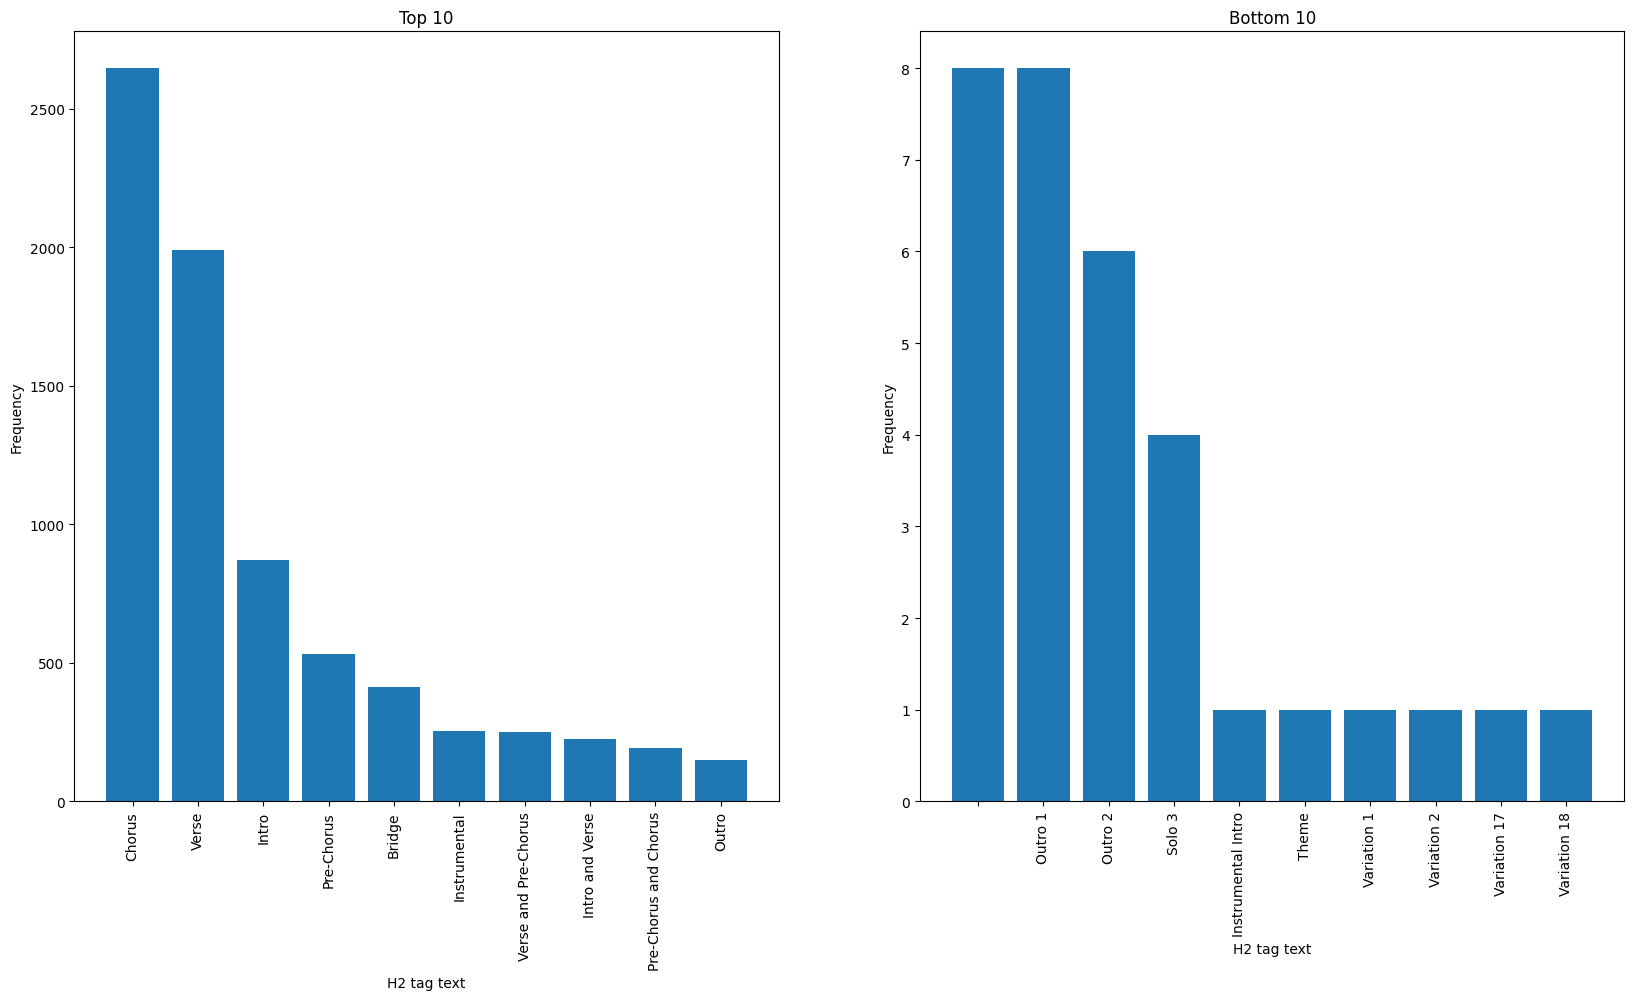

In [117]:
# Trực quan hóa dữ liệu trong letters_h2_text_frequency
import matplotlib.pyplot as plt
import numpy as np

# Sắp xếp theo tần suất giảm dần
sorted_h2_tag_text_frequency = dict(sorted(letters_h2_text_frequency.items(), key=lambda item: item[1], reverse=True))

# Lấy 10 phần tử đầu tiên
top_10 = dict(list(sorted_h2_tag_text_frequency.items())[:10])

# Lấy 10 phần tử cuối cùng
bottom_10 = dict(list(sorted_h2_tag_text_frequency.items())[-10:])

# Vẽ 1 biểu đồ chứa 2 biểu đồ con, một biểu đồ nằm bên trái, một biểu đồ nằm bên phải
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Biểu đồ bên trái
ax1.bar(top_10.keys(), top_10.values())
ax1.set_title('Top 10')
ax1.set_xlabel('H2 tag text')
ax1.set_ylabel('Frequency')
ax1.set_xticklabels(top_10.keys(), rotation=90)

# Biểu đồ bên phải
ax2.bar(bottom_10.keys(), bottom_10.values())
ax2.set_title('Bottom 10')
ax2.set_xlabel('H2 tag text')
ax2.set_ylabel('Frequency')
ax2.set_xticklabels(bottom_10.keys(), rotation=90)

plt.show()

In [125]:
# In ra các dòng bắt đầu bằng added trong file abc_log.txt
log_file_path = fu.relative_to_absolute_path(
    f"DataPreprocessing/song_part_frequency/{''.join(letters)}_log.txt",
    root_path=root_directory
)

with open(log_file_path, "r") as file:
    for line in file:
        if line.startswith(" added"):
            print(line)

 added /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling/GetAllSongHTML/song_list/raw_html/a/adam-neely-ft-kate-steinberg/run-away-with-me.html

 added /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling/GetAllSongHTML/song_list/raw_html/a/adam-routt/peaceful-moon.html

 added /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling/GetAllSongHTML/song_list/raw_html/a/amelie-p/basket-case.html

 added /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling/GetAllSongHTML/song_list/raw_html/b/benny-tipene/make-you-mine.html

 added /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling/GetAllSongHTML/song_list/raw_html/b/bjork/mutual-core.html

 added /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling/GetAllSongHTML/song_list/raw_html/c/c418/mice-on-venus.html

 added /Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Bra